In [88]:
import pandas as pd
import pylab as plt
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

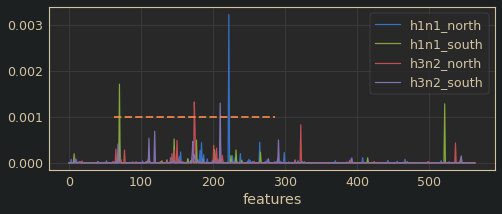

In [89]:
fig=plt.figure(figsize=[8,3])
ax=plt.gca()
df1=pd.read_csv('./north_h1n1_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'h1n1_north'})
df2=pd.read_csv('./south_h1n1_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'h1n1_south'})
df3=pd.read_csv('./north_h3n2_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'h3n2_north'})
df4=pd.read_csv('./south_h3n2_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'h3n2_south'})
df=df1.join(df2,lsuffix='north',rsuffix='south').join(df3,rsuffix='northh3n2').join(df4,rsuffix='southh3n2')
df.plot(ax=ax,logy=False)

plt.plot([63,286],[.001,0.001],'--y',lw=2,alpha=.8)

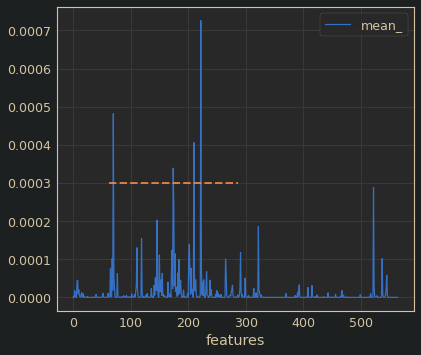

In [90]:
mf=pd.DataFrame(df.mean(axis=1).ewm(alpha=.9).mean(),columns=['mean_'])
mf.plot()
plt.plot([63,286],[.0003,0.0003],'--y',lw=2,alpha=.8)

In [91]:
dfs=df.join(mf)

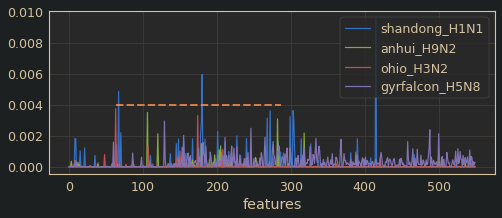

In [92]:
fig=plt.figure(figsize=[8,3])
ax=plt.gca()
df1=pd.read_csv('./A:swine:Shandong:1207:2016_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'shandong_H1N1'})
df2=pd.read_csv('./A:Anhui-Lujiang:39:2018_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'anhui_H9N2'})
df3=pd.read_csv('./A:Ohio:13:2017_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'ohio_H3N2'})
df4=pd.read_csv('./A:gyrfalcon:Washington:41088:2014_ha_SHAP.csv',index_col=0).sort_index().rename(columns={'shpc':'gyrfalcon_H5N8'})
df=df1.join(df2,lsuffix='north',rsuffix='south').join(df3,rsuffix='northh3n2').join(df4,rsuffix='southh3n2')
df.plot(ax=ax,logy=False)
plt.plot([63,286],[.004,0.004],'--y',lw=2,alpha=.8)

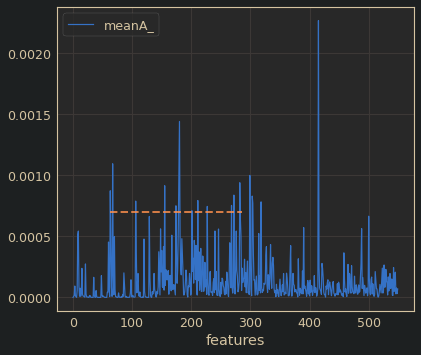

In [93]:
mfa=pd.DataFrame(df.mean(axis=1).ewm(alpha=.9).mean(),columns=['meanA_'])
mfa.plot()
plt.plot([63,286],[.0007,0.0007],'--y',lw=2,alpha=.8)

In [94]:
DF=df.join(mfa).join(dfs)
DF.to_csv('allshap.csv')

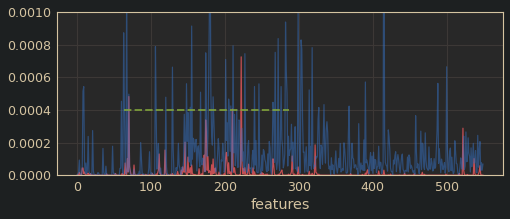

In [95]:
fig=plt.figure(figsize=[8,3])
ax=plt.gca()
ax=DF.mean_.plot(color='r',ax=ax)
ax=DF.meanA_.plot(ax=ax,alpha=.5)
ax.set_ylim(0,0.001)
plt.plot([63,286],[.0004,0.0004],'--g',lw=2,alpha=.8)

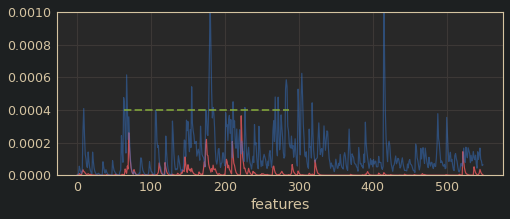

In [97]:
fig=plt.figure(figsize=[8,3])
ax=plt.gca()
ax=DF.mean_.ewm(alpha=.5).mean().plot(color='r',ax=ax)
ax=DF.meanA_.ewm(alpha=.5).mean().plot(ax=ax,alpha=.5)
ax.set_ylim(0,0.001)
plt.plot([63,286],[.0004,0.0004],'--g',lw=2,alpha=.8)